In [1]:
import pandas as pd
import numpy as np

from encryption import encrypt_column, decrypt_column

### **Define Data Quality Rules**

<b>1. Set up the collaboration environment you will do!</b><br>
Data Quality starts with a good environment to make the collaboration process effective. It ensures we all have access to the same data at the same time. (Availability/Accessibility/Coherence/Durability using Github and workflows to automatically secure the incoming changes).<br><br>

<b>2. Careful data extraction you will perform!</b><br>
Then, it's important to perform the proper extraction of the datasets - here by setting up the right delimiters.<br><br>

<b>3. Data Analysis Tool you will use!</b><br>
Most of the time, we perform Data Analysis step right in the Jupyter Notebook. But now, we will perform differently and use a Data Analysis Tool called <i>Dataiku</i> to help us in the process, advice us, and reinforce our observations/statements. We can easily miss out important elements.<br><br>

<b>4. Into the data cleaning you will deep dive!</b><br>
The Data Analysis Tool was just help. Now, you must deepen the observation by continuing the data analysis part and by including some relevant metrics on your own to watch for incoherences and things to change (data cleaning).<br><br>

<b>5. Of highly help can be the visualizations</b><br>
Can be a good way to visualize the different trends of the data, especially when there are a lot of them.<br><br>

<b>6. Code reviewing you must!</b><br>
It's a good practice to make several people read your code and use a tool to detect potential breach in your code (e.g. visible passwords). It's not only necessary at the end but during all the project time. For example, on GitHub you can set up rules to pushing to the main branch only if a specific person validate your request (accept your pull request after reviewing your code), or if the code has no merge conflicts, or make the main branch "read-only" (disabling the pushes etc.).

<b>The Different Levels of Confidentiality for encryption</b>

Encryption is something really important in case of a data leak. Here our encryption file will not be publicly available to not be able to decrypt the data.

<u>Public</u>: Information that can be shared openly with anyone, like a company's website content.

<u>Internal</u>: Information meant for use within the organization, like internal memos or non-sensitive employee communications. (We don't encrypt but in some business policies it might be required to store the data)

<u>Confidential</u>: Sensitive information that requires protection, such as business strategies, customer data, or financial records. (To encrypt)

<u>Restricted</u>: Highly sensitive information with strict access controls, like trade secrets or personal health information. (To encrypt)

### **Data Extraction**

In [2]:
customers_with_errors = pd.read_csv("datasets/customers_with_errors.csv", delimiter=';')
customers_with_errors.head()

,Customer ID,Title,First Name,Middle Name,Last Name,Email,Phone Number,Street,City,Postal Code,Country,Birthday,Age,Subscription Date,Update Date
0,CUST001,Mr.,Robert,Anna,Cain,robert.cain@outlook.com,14165551234,75944 John Forges,NaN,NaN,United States,25/10/1961,63.0,17/07/2021,01/06/2022
1,CUST002,Ms.,Lisa,Brian,Williams,lisa.williams@example.fr,19055556789,34633 Sosa Fork,NaN,NaN,United States,11/06/1969,55.0,09/01/2023,22/11/2024
2,CUST003,NaN,Richard,Cameron,Beard,richard.beard@example.fr,16475552345,8474 Crystal Unions Suite 449,NaN,NaN,United States,29/09/1988,36.0,18/04/2021,05/01/2023
3,CUST004,Mr.,Nicole,Gina,Obrien,nicole.obrien@outlook.com,16045553456,8603 Scott Turnpike Suite 266,South Madisonside,25568.0,United States,30/07/1997,27.0,27/02/2020,13/03/2021
4,CUST005,Mr.,Jeremy,Travis,Leon,jeremy.leon@yahoo.com,14035554567,074 Ryan Loaf Suite 615,North Kimberly,NaN,United States,28/08/1953,71.0,16/04/2023,02/04/2024


In [3]:
deco_sales = pd.read_csv("datasets/deco_sales")
deco_sales.head()

,Product ID,Customer ID,Transaction Date,Currency,Amount,Quantity,Update Date
0,1,CUST001,2024-11-05,USD,250.0,10,2024-11-06
1,2,CUST002,2024-11-07,USD,220.0,4,2024-11-08
2,3,CUST003,2024-11-10,EUR,72.0,4,2024-11-12
3,4,CUST004,2024-11-09,EUR,60.0,4,2024-11-10
4,5,CUST005,2024-11-11,USD,150.0,5,2024-11-12


In [4]:
deco_product = pd.read_csv("datasets/deco_product", delimiter='\t')
deco_product.head()

,Product ID,Product Name,Category,Starting Price,Selling Price,Currency,Current Stock,Supplier,Update Date,Availability
0,1,Decorative Vase,Vases,15.0,25.0,USD,100,HomeDecor Inc.,01/11/2024,Available
1,2,Elegant Wall Mirror,Mirrors,50.0,55.0,USD,50,Luxury Living,01/11/2024,Available
2,3,Wooden Frame,Frames,12.0,18.0,EUR,200,Rustic Charm,15/10/2024,Available
3,4,Candle Holder,Candles,10.0,15.0,EURO,150,Cozy Creations,20/10/2024,Available
4,5,Throw Pillow,Pillows,25.0,30.0,USD,100,Plush Home,10/11/2024,Out of Stock


### **Data Analysis with <i>Zoho Analytics</i>**

<i>N.B. The free version of Zoho Analytics isn't really relevant and doesn't provide detailed or advanced metrics. That's why in the next session we will use Dataiku because it gives us access to more functionnalities.</i>

Anyway, we will try to understand the given insights.

<u>Zoho Analytics Insights for <i>customers_with_errors:</i></u>

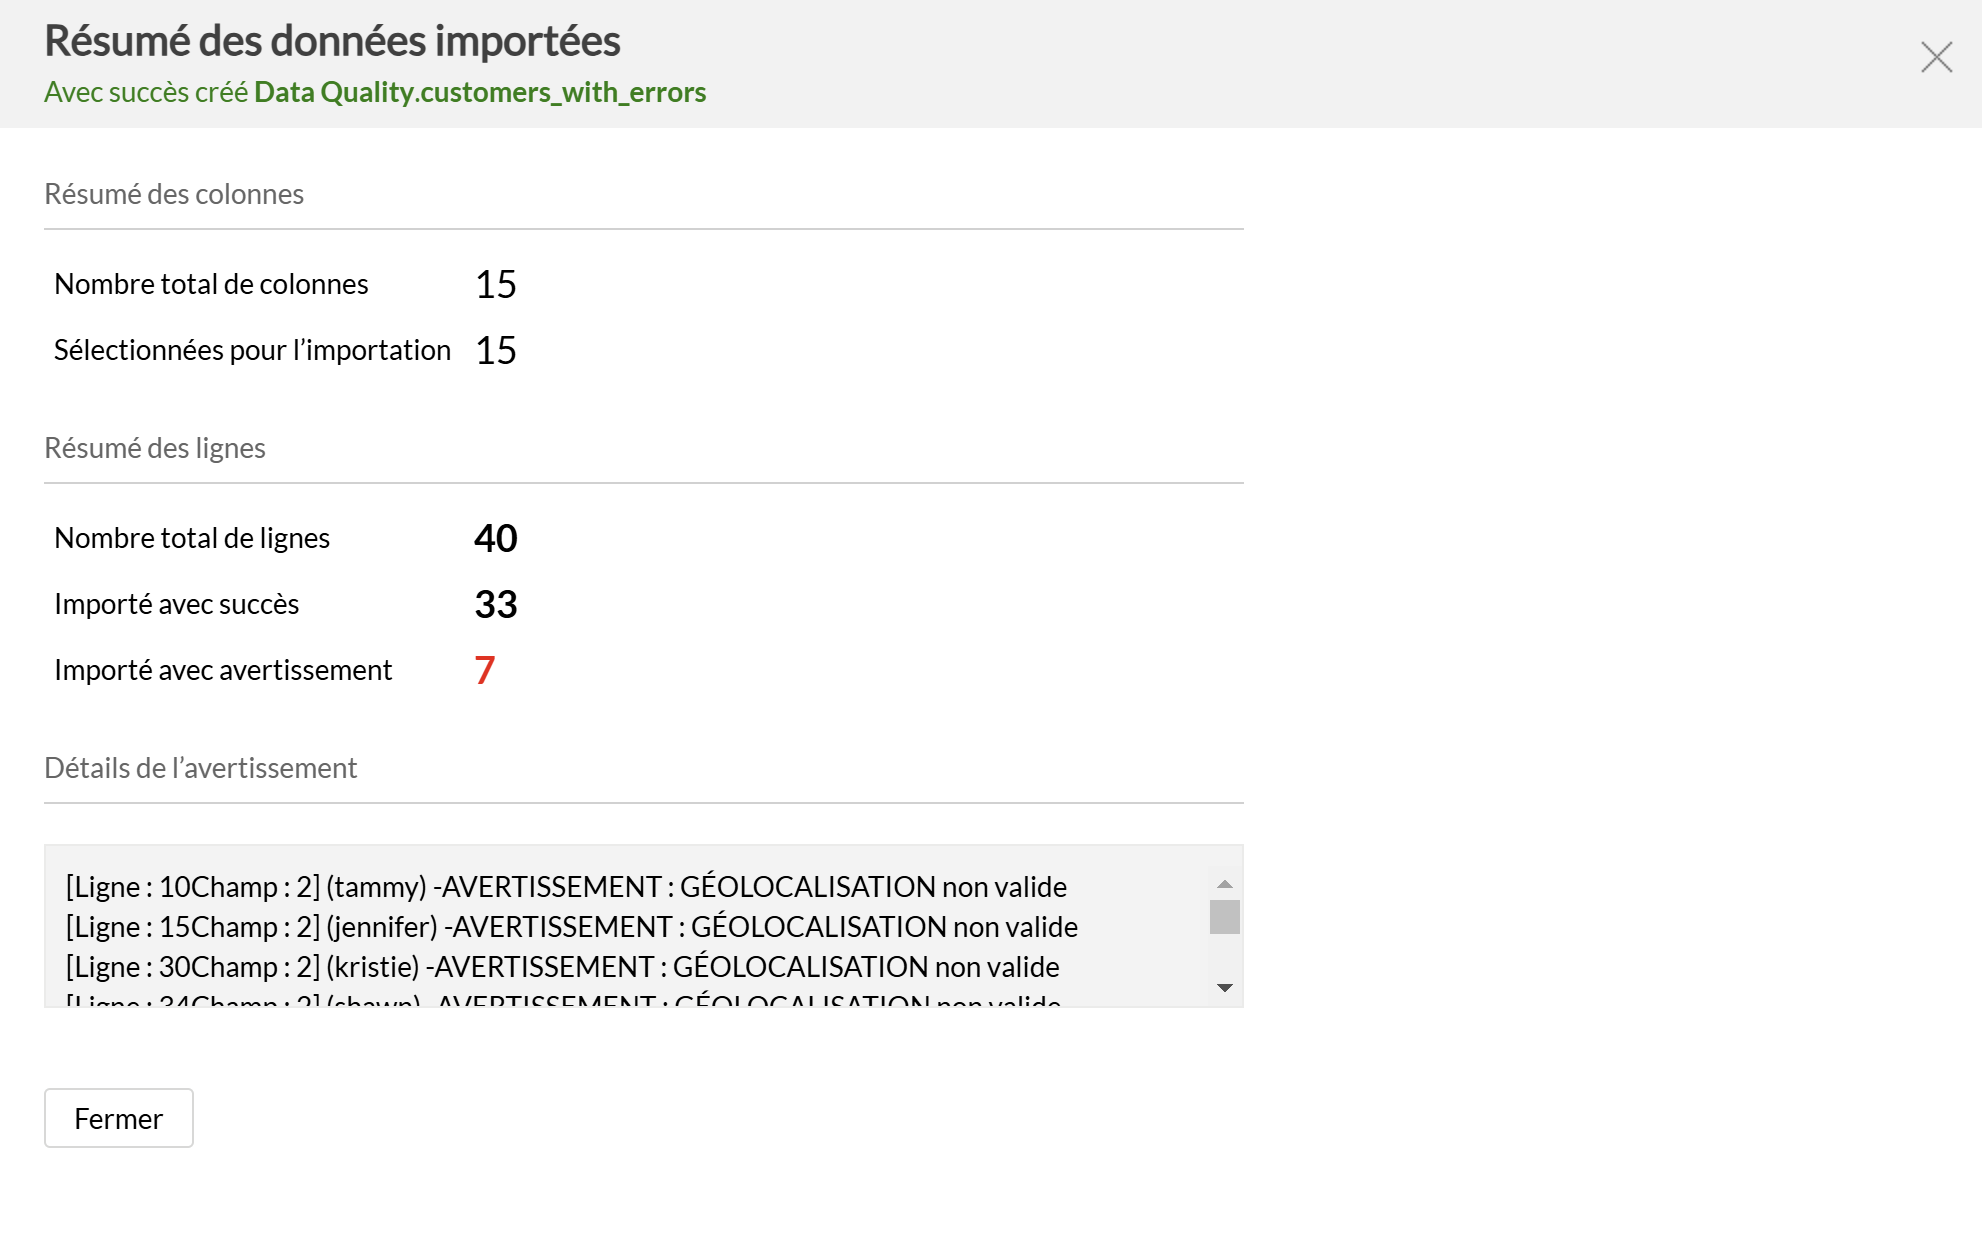

The detailed advertisements (7 in red) appears to occur because the localization associated with some lines can't be found geographically surely due to missing information or mispelling error(s). The solution can be to search the correct address and risk to put a wrong one, to delete it, or not to change it.<br>
According to this use case, we will consider that the localization is a valuable insight and choose not to change it.

In [5]:
customers_with_errors.iloc[8] # e.g. 8th row have a geolocalization error

Customer ID                                CUST009
Title                                          Mr.
First Name                                   Tammy
Middle Name                                Brandon
Last Name                                     Lowe
Email                         tammy.lowe@gmail.com
Phone Number                           18195558901
Street               4680 Frazier Centers Apt. 032
City                                    East Tanya
Postal Code                                    NaN
Country                              United States
Birthday                                24/01/1987
Age                                           37.0
Subscription Date                       06/01/2024
Update Date                             15/07/2024
Name: 8, dtype: object

In [6]:
print(f"They are {len(customers_with_errors.columns)} columns in the customers_with_errors dataset.")
print(f"They are {len(customers_with_errors)} lines in the customers_with_errors dataset.")

They are 15 columns in the customers_with_errors dataset.
They are 51 lines in the customers_with_errors dataset.


After a little investigation, we see that the 11 last elements are empty lines (NaN)!<br>
Let's remove them.

In [7]:
customers_with_errors.tail(12)

,Customer ID,Title,First Name,Middle Name,Last Name,Email,Phone Number,Street,City,Postal Code,Country,Birthday,Age,Subscription Date,Update Date
39,CUST040,NaN,Sherri,Jennifer,Henderson,sherri.henderson@yahoo.com,17 785 554 567,014 Allen Summit,NaN,42483.0,United States,11/12/2003,21.0,01/05/2021,03/11/2023
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
customers_with_errors = customers_with_errors.iloc[:40, :]
customers_with_errors.tail()

,Customer ID,Title,First Name,Middle Name,Last Name,Email,Phone Number,Street,City,Postal Code,Country,Birthday,Age,Subscription Date,Update Date
35,CUST036,Ms.,Brett,Curtis,Mccall,brett.mccall@outlook.com,12 265 559 012,75152 Maxwell Green Apt. 805,NaN,NaN,United States,08/06/1995,29.0,09/06/2021,08/05/2024
36,CUST037,Mr.,Jasmine,Nancy,Rodriguez,jasmine.rodriguez@yahoo.com,13 435 551 234,NaN,New Michaelton,48862.0,United States,17/11/1999,25.0,29/06/2020,28/12/2020
37,CUST038,Prof.,Patricia,Mary,Hudson,patricia.hudson@yahoo.com,14 375 552 345,1051 Phillip Ridge Apt. 054,NaN,50958.0,United States,26/03/2001,23.0,09/11/2024,16/11/2024
38,CUST039,Mrs.,Allison,George,Townsend,allison.townsend@outlook.com,14 385 553 456,14801 Danielle Falls Suite 544,Sandrachester,67505.0,United States,16/12/1963,61.0,18/02/2020,22/07/2023
39,CUST040,NaN,Sherri,Jennifer,Henderson,sherri.henderson@yahoo.com,17 785 554 567,014 Allen Summit,NaN,42483.0,United States,11/12/2003,21.0,01/05/2021,03/11/2023


<u>Zoho Analytics Insights for <i>deco_product:</i></u>

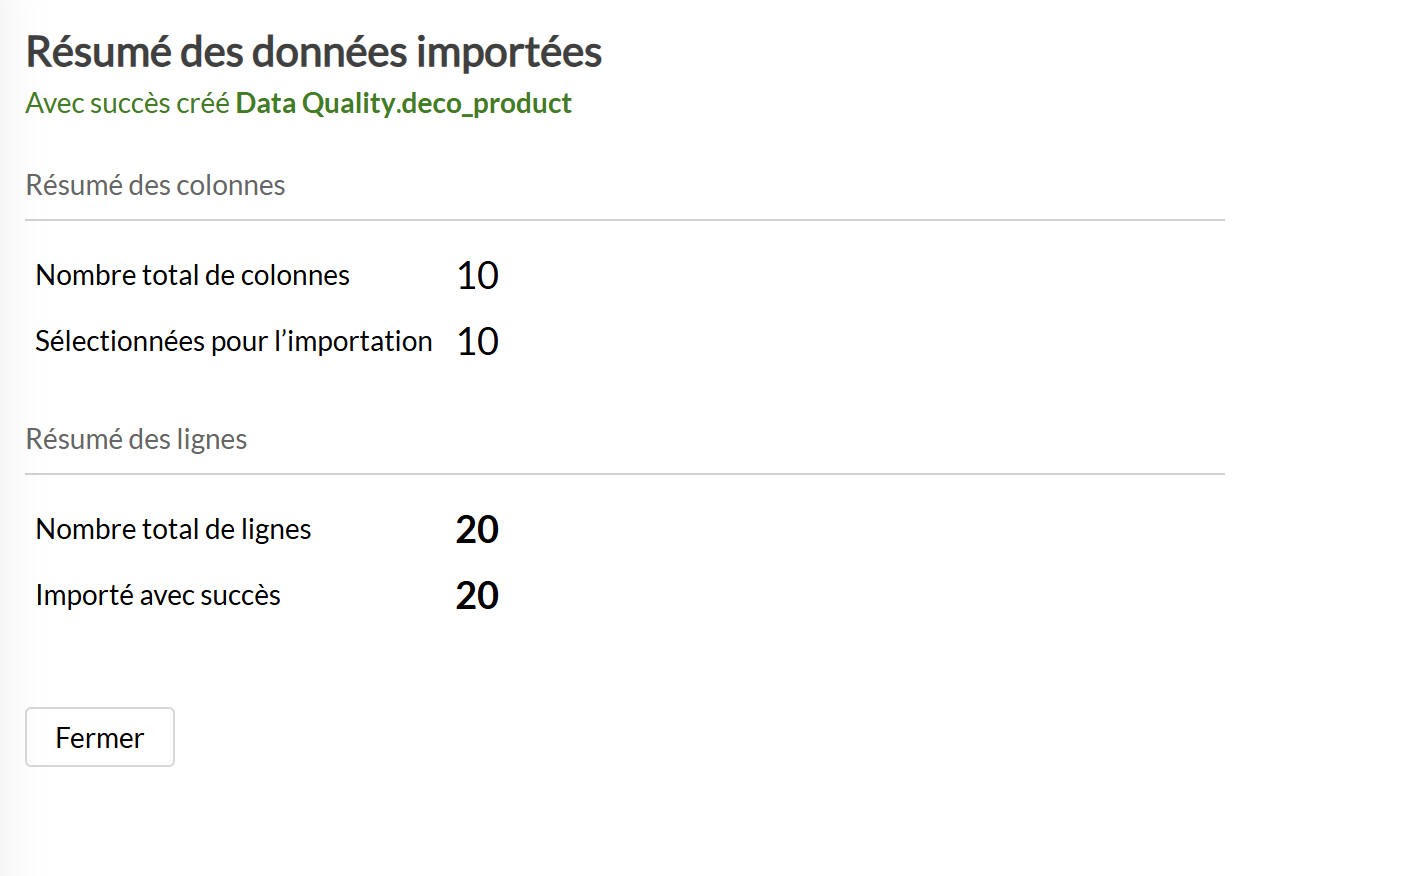

In [9]:
print(f"They are {len(deco_product.columns)} columns in the deco_product dataset.")
print(f"They are {len(deco_product)} lines in the deco_product dataset.")

They are 10 columns in the deco_product dataset.
They are 20 lines in the deco_product dataset.


<u>Zoho Analytics Insights for <i>deco_sales:</i></u>

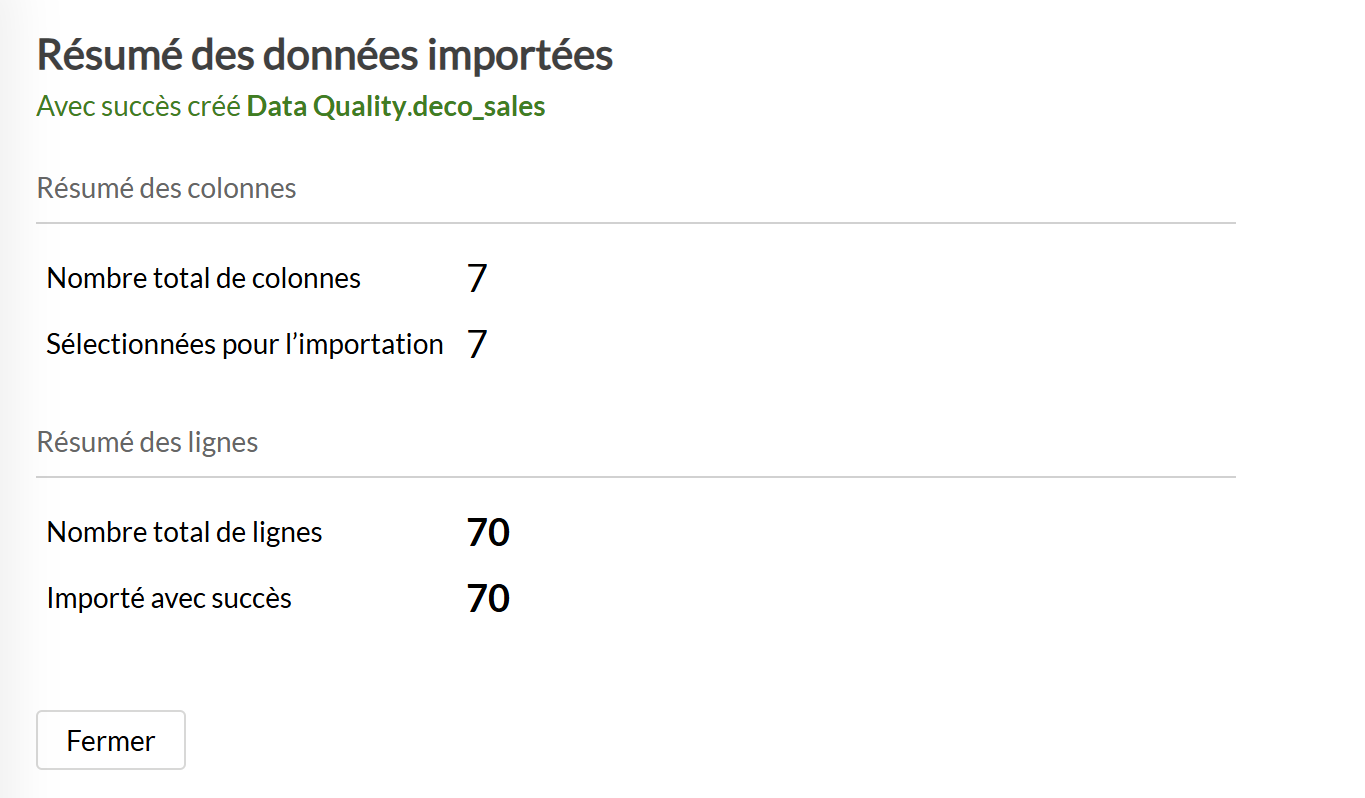

In [10]:
print(f"They are {len(deco_sales.columns)} columns in the deco_sales dataset.")
print(f"They are {len(deco_sales)} lines in the deco_sales dataset.")

They are 7 columns in the deco_sales dataset.
They are 70 lines in the deco_sales dataset.


### **Data Analysis with <i>Dataiku</i>**

The datasets aren't that big, so we can visually evaluate them.

<u>Dataiku Insights for <i>customers_with_errors:</i></u>

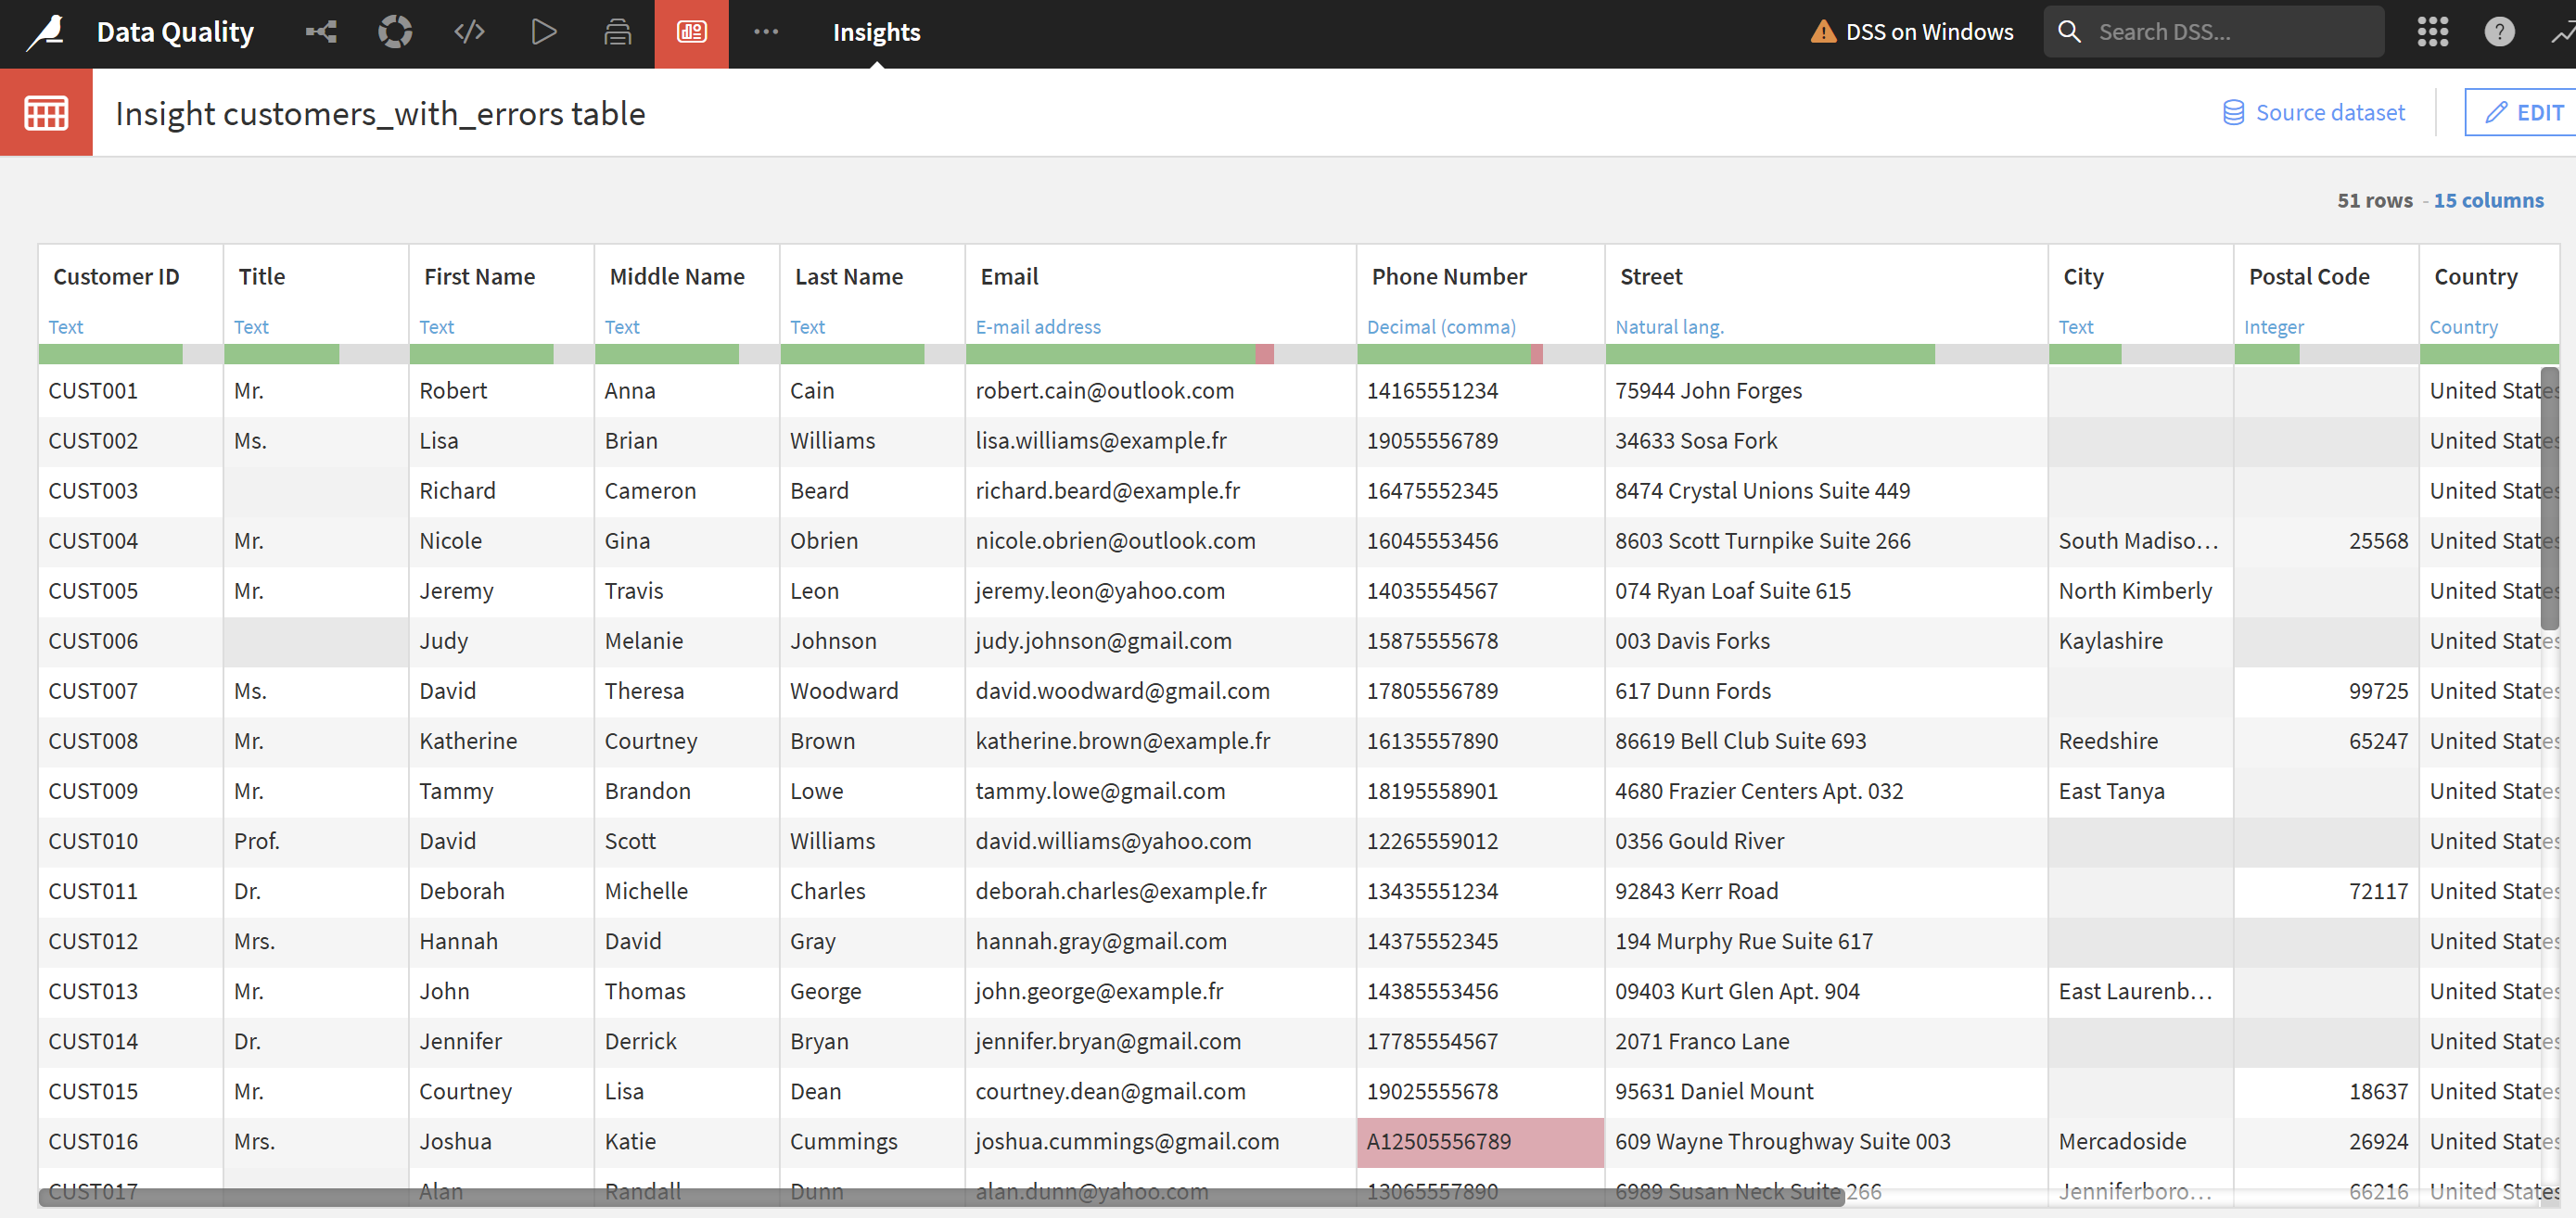

According to this insight, we have one error in the column <i>"Email"</i> and another one in the <i>"Phone Number"</i> one.

In [11]:
# Ms. MEYER email isn't valid
customers_with_errors.iloc[34]

Customer ID                          CUST035
Title                                    Ms.
First Name                           Michael
Middle Name                           Alicia
Last Name                              Meyer
Email                                 Meyer@
Phone Number                  18 195 558 901
Street               684 Cody Ferry Apt. 222
City                      Lake Ronaldborough
Postal Code                              NaN
Country                        United States
Birthday                          28/07/1990
Age                                     34.0
Subscription Date                 17/07/2022
Update Date                       13/04/2023
Name: 34, dtype: object

Indeed "Meyer@" isn't a valid format so we will set it up to NaN preferably has we can't guess what is the good one.

In [12]:
customers_with_errors.Email.iloc[34] = np.nan
customers_with_errors.iloc[34]

C:\Users\louis\AppData\Local\Temp\ipykernel_56516\299009503.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  customers_with_errors.Email.iloc[34] = np.nan


Customer ID                          CUST035
Title                                    Ms.
First Name                           Michael
Middle Name                           Alicia
Last Name                              Meyer
Email                                    NaN
Phone Number                  18 195 558 901
Street               684 Cody Ferry Apt. 222
City                      Lake Ronaldborough
Postal Code                              NaN
Country                        United States
Birthday                          28/07/1990
Age                                     34.0
Subscription Date                 17/07/2022
Update Date                       13/04/2023
Name: 34, dtype: object

In [13]:
# Mrs. CUMMINGS phone number isn't valid
customers_with_errors.iloc[15]

Customer ID                                 CUST016
Title                                          Mrs.
First Name                                   Joshua
Middle Name                                   Katie
Last Name                                  Cummings
Email                     joshua.cummings@gmail.com
Phone Number                           A12505556789
Street               609 Wayne Throughway Suite 003
City                                    Mercadoside
Postal Code                                 26924.0
Country                               United States
Birthday                                 29/03/1950
Age                                            74.0
Subscription Date                        05/11/2020
Update Date                              13/01/2021
Name: 15, dtype: object

Here we just need to remove the invalid caracter (A at the beginning).

In [14]:
customers_with_errors.iloc[15, 6] = customers_with_errors.iloc[15, 6].replace('A', '')
customers_with_errors.iloc[15]

Customer ID                                 CUST016
Title                                          Mrs.
First Name                                   Joshua
Middle Name                                   Katie
Last Name                                  Cummings
Email                     joshua.cummings@gmail.com
Phone Number                            12505556789
Street               609 Wayne Throughway Suite 003
City                                    Mercadoside
Postal Code                                 26924.0
Country                               United States
Birthday                                 29/03/1950
Age                                            74.0
Subscription Date                        05/11/2020
Update Date                              13/01/2021
Name: 15, dtype: object

<u>Dataiku Insights for <i>deco_product:</i></u>

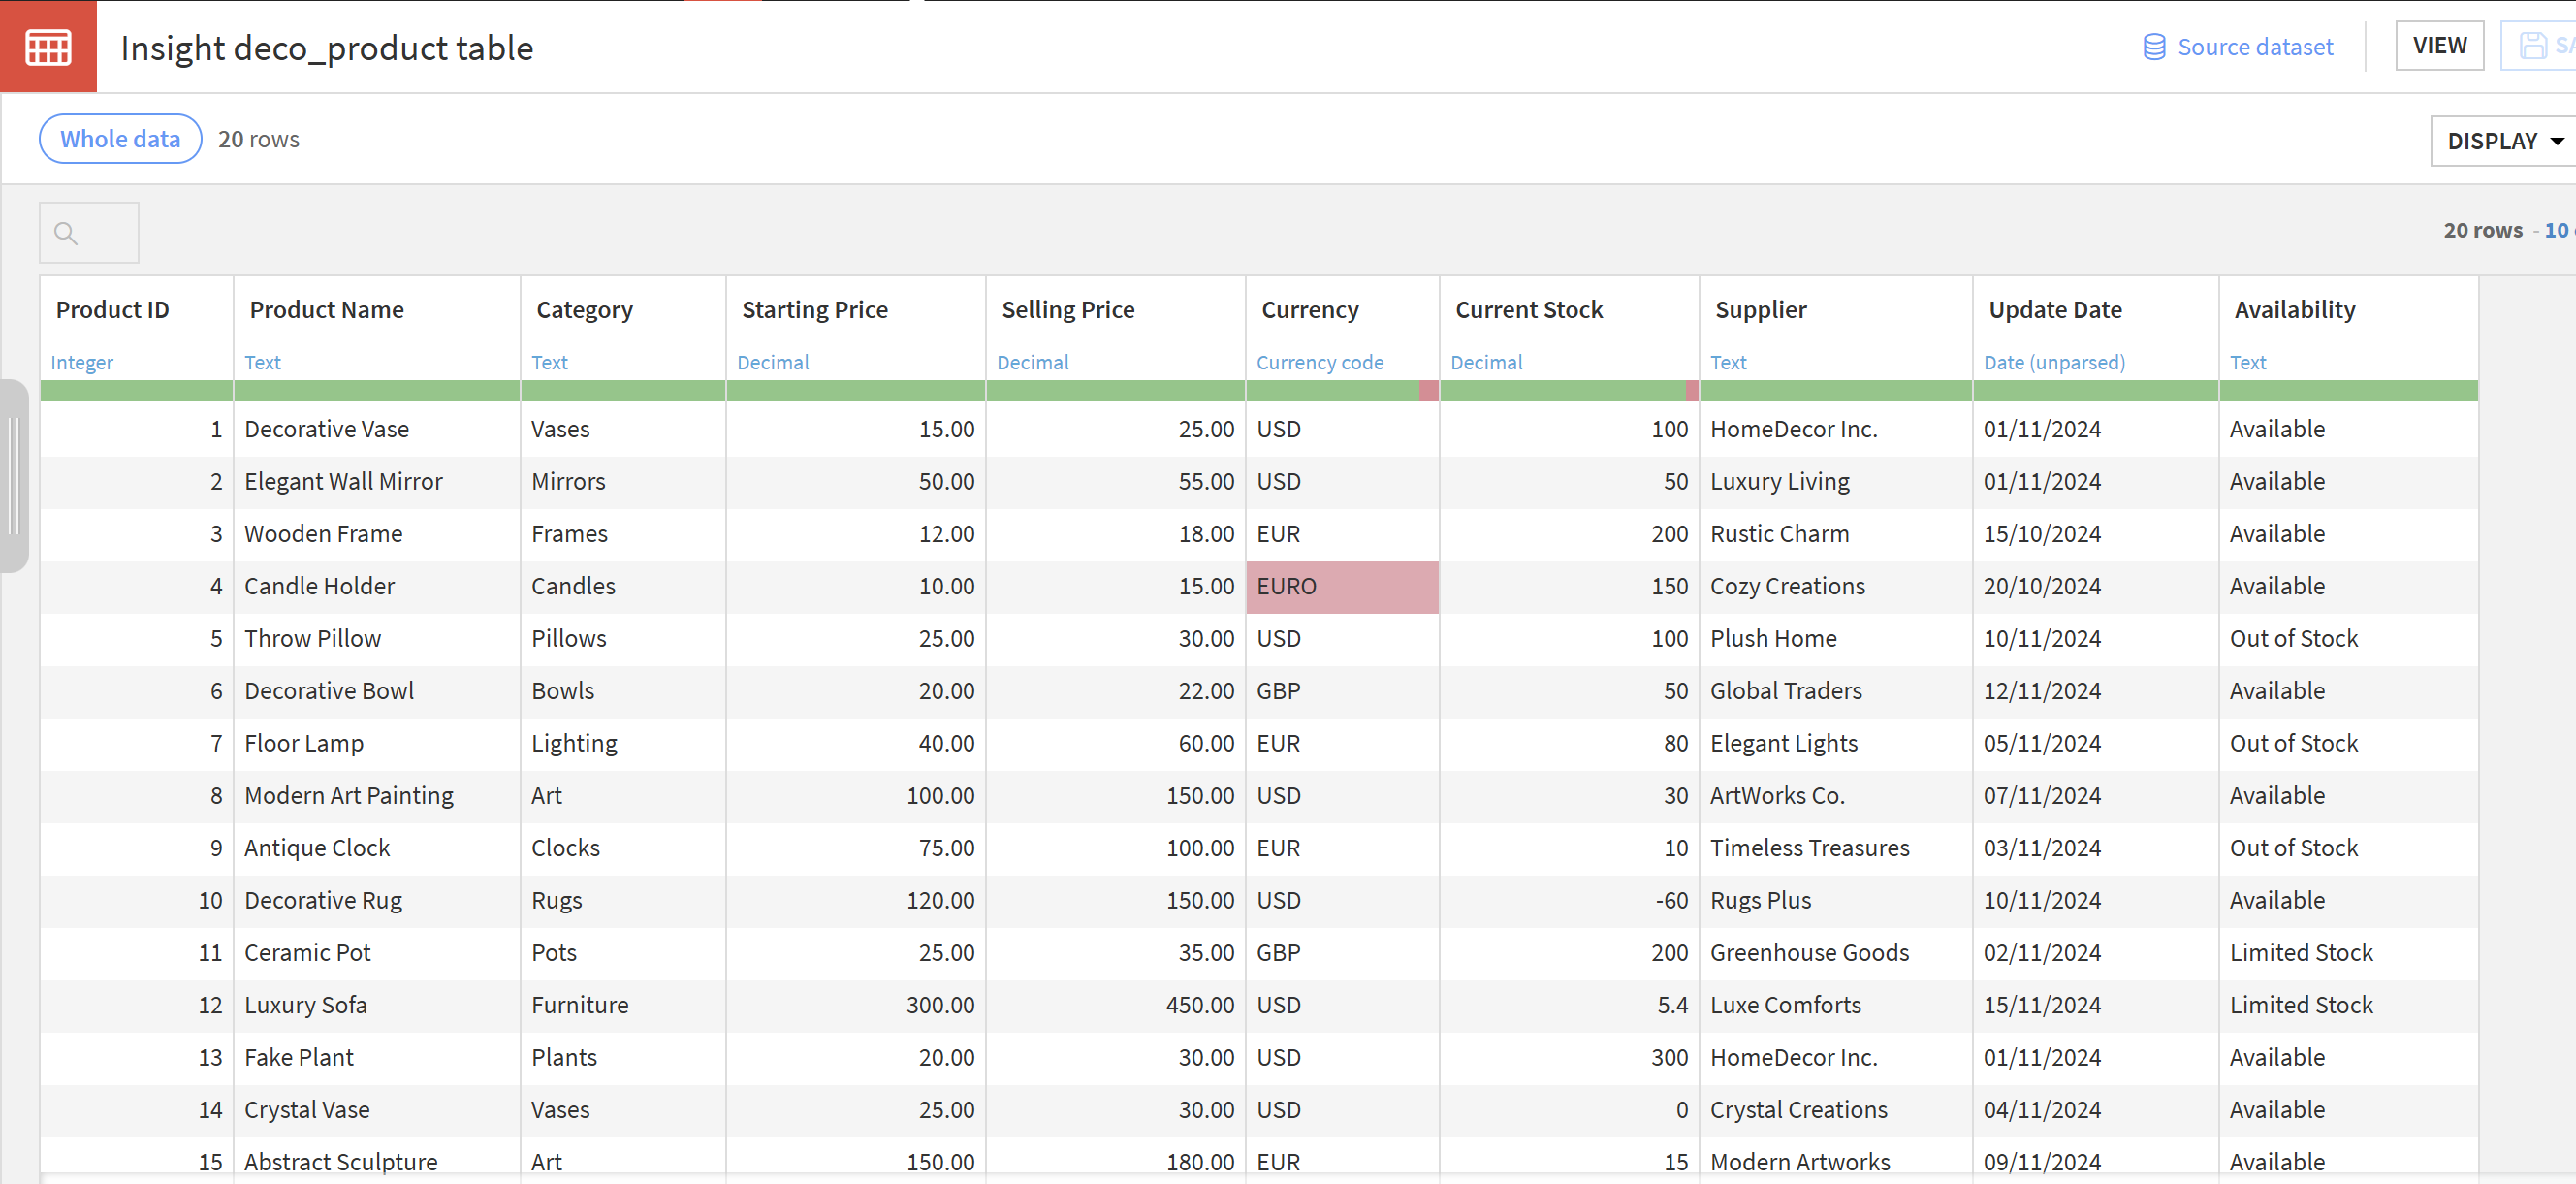

In [15]:
# We replace EURO by EUR in the currency column
deco_product.Currency = deco_product.Currency.replace('EURO', 'EUR')
deco_product.iloc[3]

Product ID                     4
Product Name       Candle Holder
Category                 Candles
Starting Price              10.0
Selling Price               15.0
Currency                     EUR
Current Stock                150
Supplier          Cozy Creations
Update Date           20/10/2024
Availability           Available
Name: 3, dtype: object

In [16]:
# The current stock isn't valid
deco_product.iloc[16]

Product ID                        17
Product Name      Large Floor Mirror
Category                     Mirrors
Starting Price                  75.0
Selling Price                   85.0
Currency                         EUR
Current Stock                    a20
Supplier                Mirror Magic
Update Date               30/10/2024
Availability               Available
Name: 16, dtype: object

<u>The question is:</u><br>
Is the correct number 20 or 120? (Why 120? Because on the French Keyboard configuration, the touch "a" is very close from "1").<br>
But as we consider that the "a" is in lower case and not in upper case, it probably means that the correct number is 20.<br><br>
Sometimes in data quality, it's not that bad to have a such degree of overthinking. As we can't ask to the team that provides the dataset, we are by our own.

<u>Dataiku Insights for <i>deco_sales:</i></u>

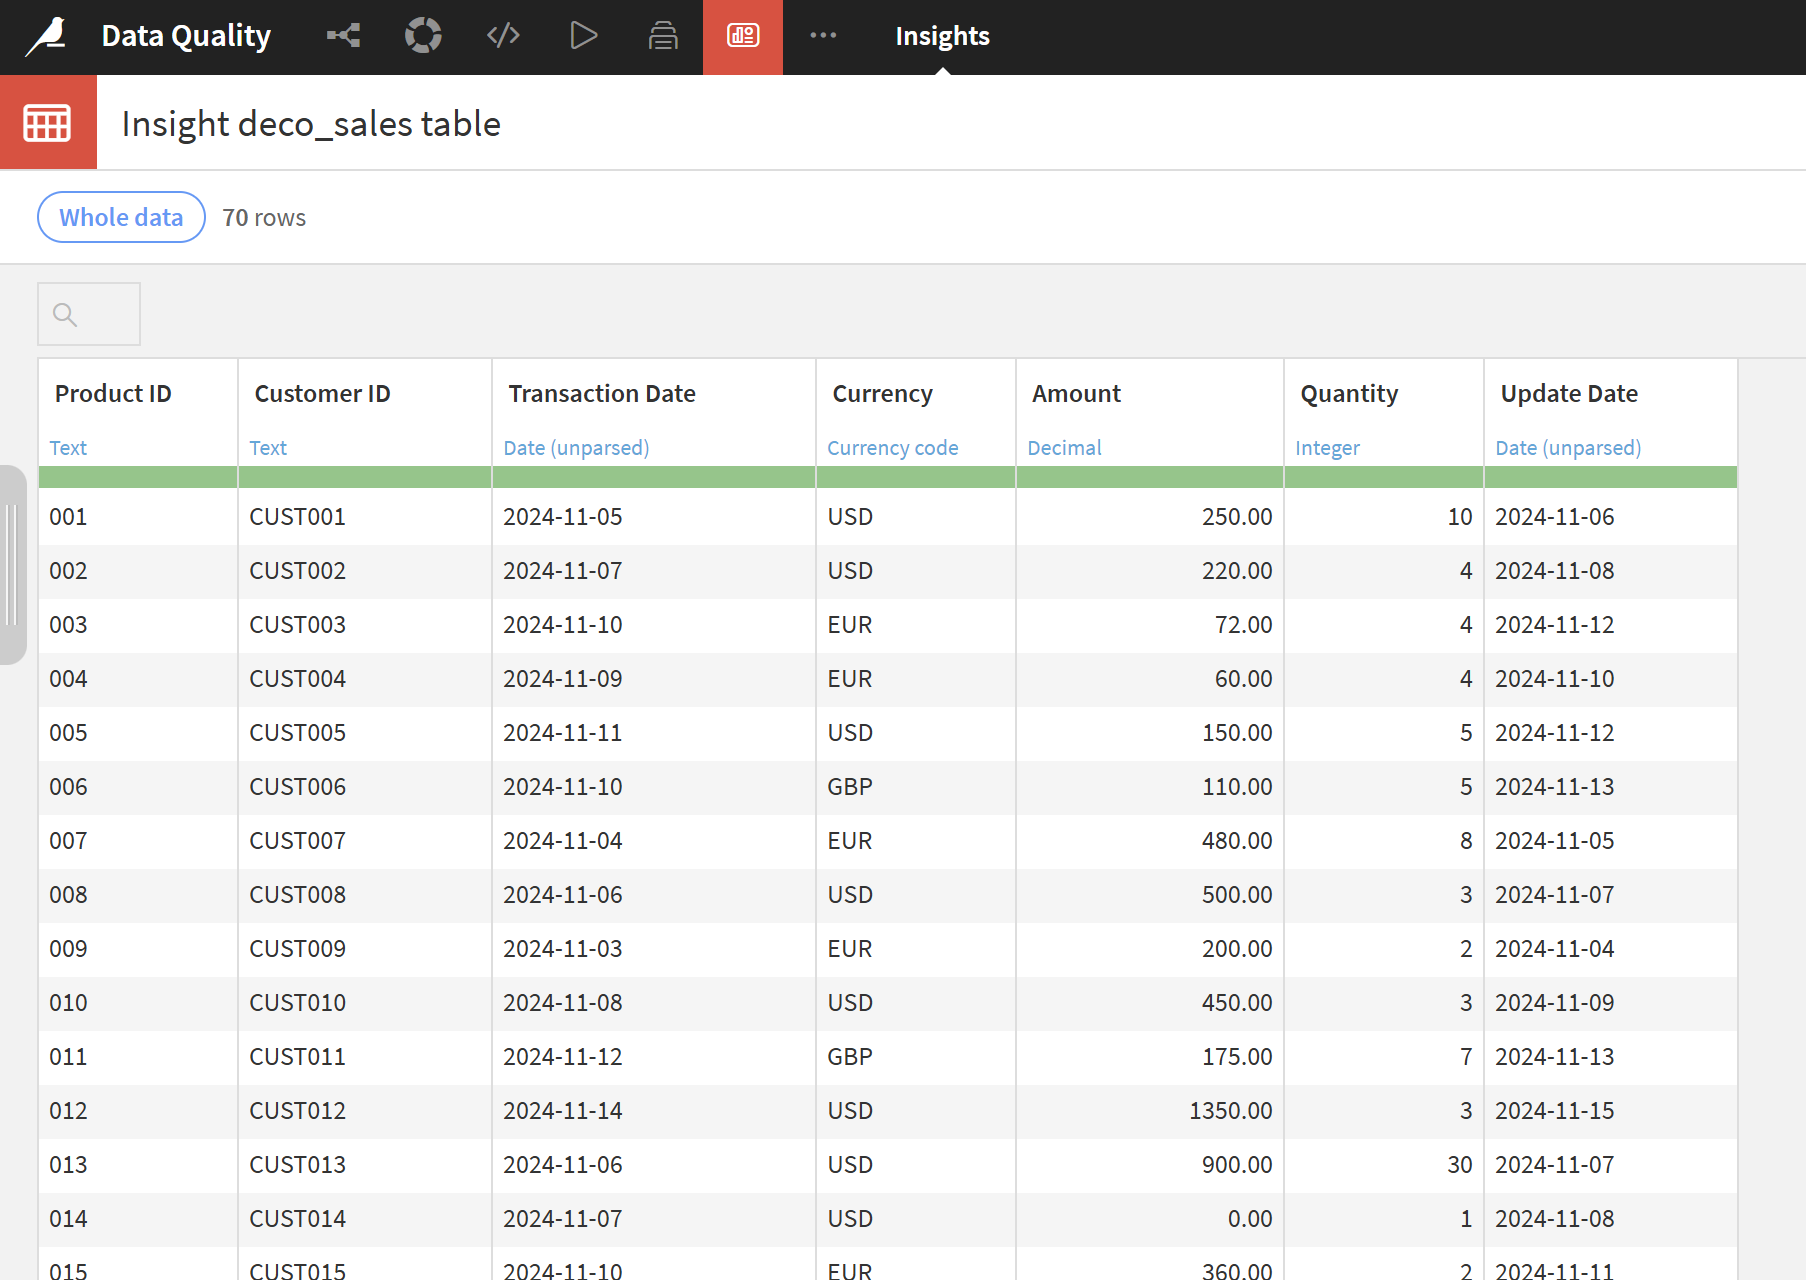

This is a dataset of dream, everything is good.

### **Data Cleaning**

#### <b>First dataset: customers_with_errors.csv</b>

In [17]:
len(customers_with_errors)

40

In [18]:
customers_with_errors.head()

,Customer ID,Title,First Name,Middle Name,Last Name,Email,Phone Number,Street,City,Postal Code,Country,Birthday,Age,Subscription Date,Update Date
0,CUST001,Mr.,Robert,Anna,Cain,robert.cain@outlook.com,14165551234,75944 John Forges,NaN,NaN,United States,25/10/1961,63.0,17/07/2021,01/06/2022
1,CUST002,Ms.,Lisa,Brian,Williams,lisa.williams@example.fr,19055556789,34633 Sosa Fork,NaN,NaN,United States,11/06/1969,55.0,09/01/2023,22/11/2024
2,CUST003,NaN,Richard,Cameron,Beard,richard.beard@example.fr,16475552345,8474 Crystal Unions Suite 449,NaN,NaN,United States,29/09/1988,36.0,18/04/2021,05/01/2023
3,CUST004,Mr.,Nicole,Gina,Obrien,nicole.obrien@outlook.com,16045553456,8603 Scott Turnpike Suite 266,South Madisonside,25568.0,United States,30/07/1997,27.0,27/02/2020,13/03/2021
4,CUST005,Mr.,Jeremy,Travis,Leon,jeremy.leon@yahoo.com,14035554567,074 Ryan Loaf Suite 615,North Kimberly,NaN,United States,28/08/1953,71.0,16/04/2023,02/04/2024


In [19]:
customers_with_errors.describe(include='all')

,Customer ID,Title,First Name,Middle Name,Last Name,Email,Phone Number,Street,City,Postal Code,Country,Birthday,Age,Subscription Date,Update Date
count,40,32,40,40,40,39,38,38,20,18.000000,40,40,40.000000,40,40
unique,40,5,36,39,38,39,38,38,20,NaN,1,40,NaN,40,39
top,CUST001,Mr.,Joshua,Brandon,Williams,robert.cain@outlook.com,14165551234,75944 John Forges,South Madisonside,NaN,United States,25/10/1961,NaN,17/07/2021,04/06/2023
freq,1,11,3,2,2,1,1,1,1,NaN,40,1,NaN,1,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52985.722222,NaN,NaN,48.550000,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27850.812593,NaN,NaN,19.281917,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3292.000000,NaN,NaN,21.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28160.750000,NaN,NaN,29.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50987.000000,NaN,NaN,46.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70203.500000,NaN,NaN,67.750000,NaN,NaN


In [20]:
# Delete age column
customers_with_errors = customers_with_errors.drop(columns='Age')
customers_with_errors.columns

Index(['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Email', 'Phone Number', 'Street', 'City', 'Postal Code', 'Country',
       'Birthday', 'Subscription Date', 'Update Date'],
      dtype='object')

##### Completeness: Identify missing data

In [21]:
missing_values=customers_with_errors.isnull().sum()
missing_percent= ((missing_values) / len(customers_with_errors)) * 100

print(round(missing_percent,2))

Customer ID           0.0
Title                20.0
First Name            0.0
Middle Name           0.0
Last Name             0.0
Email                 2.5
Phone Number          5.0
Street                5.0
City                 50.0
Postal Code          55.0
Country               0.0
Birthday              0.0
Subscription Date     0.0
Update Date           0.0
dtype: float64


We can ask ourselves if it's good to remove <i>"City"</i> and <i>"Postal Code"</i> columns. We will consider here that even they have a lot of missing values, we will keep them because they don't represent a highly determinant information but only something good to know when given.

##### Identify incomplete data

In [22]:
empty_rows= customers_with_errors[customers_with_errors.isnull().all(axis=1)]
print("Number of empty rows:",len(empty_rows))

Number of empty rows: 0


##### General info of the dataset

In [23]:
customers_with_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        40 non-null     object 
 1   Title              32 non-null     object 
 2   First Name         40 non-null     object 
 3   Middle Name        40 non-null     object 
 4   Last Name          40 non-null     object 
 5   Email              39 non-null     object 
 6   Phone Number       38 non-null     object 
 7   Street             38 non-null     object 
 8   City               20 non-null     object 
 9   Postal Code        18 non-null     float64
 10  Country            40 non-null     object 
 11  Birthday           40 non-null     object 
 12  Subscription Date  40 non-null     object 
 13  Update Date        40 non-null     object 
dtypes: float64(1), object(13)
memory usage: 4.5+ KB


<u>The change we will make:</u><br>
Postal Code --> into int format (because it uses less stockage space and is more appropriate here)<br>
Birthday / Subscription Date / Update Date --> into date format<br>
Age can be let to float even if it isn't very common.

In [24]:
customers_with_errors['Birthday'] = pd.to_datetime(customers_with_errors['Birthday'], errors='coerce', format='%d/%m/%Y')
customers_with_errors['Subscription Date'] = pd.to_datetime(customers_with_errors['Subscription Date'], errors='coerce', format='%d/%m/%Y')
customers_with_errors['Update Date'] = pd.to_datetime(customers_with_errors['Update Date'], errors='coerce', format='%d/%m/%Y')
customers_with_errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        40 non-null     object        
 1   Title              32 non-null     object        
 2   First Name         40 non-null     object        
 3   Middle Name        40 non-null     object        
 4   Last Name          40 non-null     object        
 5   Email              39 non-null     object        
 6   Phone Number       38 non-null     object        
 7   Street             38 non-null     object        
 8   City               20 non-null     object        
 9   Postal Code        18 non-null     float64       
 10  Country            40 non-null     object        
 11  Birthday           40 non-null     datetime64[ns]
 12  Subscription Date  40 non-null     datetime64[ns]
 13  Update Date        40 non-null     datetime64[ns]
dtypes: datetime6

##### Encryption Process

<i>We dont wan't all of our customer to view personal data that don't belong to them.</i>

Title: Public<br>
ID, Name, Subscription Date, Update Date: Internal<br>
Email, Phone, Address, Birthday: Confidential<br>

In [25]:
customers_with_errors['Email'] = encrypt_column(customers_with_errors['Email'])
customers_with_errors['Phone Number'] = encrypt_column(customers_with_errors['Phone Number'])
customers_with_errors['Birthday'] = encrypt_column(customers_with_errors['Birthday'])
customers_with_errors['Street'] = encrypt_column(customers_with_errors['Street'])
customers_with_errors['City'] = encrypt_column(customers_with_errors['City'])
customers_with_errors['Postal Code'] = encrypt_column(customers_with_errors['Postal Code'])
customers_with_errors['Country'] = encrypt_column(customers_with_errors['Country'])
customers_with_errors['Street'].head()

0    gAAAAABnhWXEO_gdFoklnNo2CU6wwxTrOEDlL3azDQxFZk...
1    gAAAAABnhWXEmNdTfhpb7Hze_XnoZC-of0_XRbya_lBDJx...
2    gAAAAABnhWXEKZknwyhcFr5BZTLrGt8ckWs7ABqnAQ4tUr...
3    gAAAAABnhWXEUaoVTT8T2CeHAfO3rJPeYb6r7R9tviGPfM...
4    gAAAAABnhWXEZOOLE7J2WMM5FZpOH2LKYVQnALNlZmMCX3...
Name: Street, dtype: object

Decomment the cell below to try the decryption process.

In [26]:
# Decrypt the 'Street' column for demonstration
customers_with_errors['Street'] = decrypt_column(customers_with_errors['Street'])
customers_with_errors['Street'].head()

0                75944 John Forges
1                  34633 Sosa Fork
2    8474 Crystal Unions Suite 449
3    8603 Scott Turnpike Suite 266
4          074 Ryan Loaf Suite 615
Name: Street, dtype: object

In [27]:
# Encrypt the 'Street' column again
customers_with_errors['Street'] = encrypt_column(customers_with_errors['Street'])
customers_with_errors['Street'].head()

0    gAAAAABnhWXE0ad6wCFnUiLpOm782GY8J6pRjX0UY23qZV...
1    gAAAAABnhWXEixkHf_xvz_3QsLRBOIuiAFa8JywoXDQA4g...
2    gAAAAABnhWXEmKxkiaCZcWI1AIvwWnwLoAoyksMkf0lH2p...
3    gAAAAABnhWXEgiDlW4DUS2xWXLYNRbC09Ip4oMfEdbxRas...
4    gAAAAABnhWXE3ps2KveexTzjPbZtwZ9ZfLLFUDk1C5b76b...
Name: Street, dtype: object

We save the cleaned dataset in a new file.

In [28]:
customers_with_errors.to_csv("datasets/cleaned_customers.csv", sep=';', index=False)

#### <b>Second dataset: deco_sales</b>

In [29]:
deco_sales.head()

,Product ID,Customer ID,Transaction Date,Currency,Amount,Quantity,Update Date
0,1,CUST001,2024-11-05,USD,250.0,10,2024-11-06
1,2,CUST002,2024-11-07,USD,220.0,4,2024-11-08
2,3,CUST003,2024-11-10,EUR,72.0,4,2024-11-12
3,4,CUST004,2024-11-09,EUR,60.0,4,2024-11-10
4,5,CUST005,2024-11-11,USD,150.0,5,2024-11-12


In [30]:
deco_sales.describe(include='all')

,Product ID,Customer ID,Transaction Date,Currency,Amount,Quantity,Update Date
count,70.000000,70,70,70,70.000000,70.000000,70
unique,NaN,50,39,3,NaN,NaN,39
top,NaN,CUST001,2024-11-10,USD,NaN,NaN,2024-11-13
freq,NaN,2,7,35,NaN,NaN,5
mean,9.785714,NaN,NaN,NaN,344.257143,6.257143,NaN
std,5.763184,NaN,NaN,NaN,306.326466,5.827684,NaN
min,1.000000,NaN,NaN,NaN,0.000000,1.000000,NaN
25%,5.000000,NaN,NaN,NaN,120.000000,3.000000,NaN
50%,9.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
75%,14.750000,NaN,NaN,NaN,480.000000,8.000000,NaN


##### Completeness: Identify missing data

In [31]:
missing_values=deco_sales.isnull().sum()
missing_percent= ((missing_values) / len(deco_sales)) * 100

print(round(missing_percent,2))

Product ID          0.0
Customer ID         0.0
Transaction Date    0.0
Currency            0.0
Amount              0.0
Quantity            0.0
Update Date         0.0
dtype: float64


##### Identify incomplete data 

In [32]:
empty_rows= deco_sales[deco_sales.isnull().all(axis=1)]
print("Number of empty rows:",len(empty_rows))

Number of empty rows: 0


##### General info of the dataset

In [33]:
deco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        70 non-null     int64  
 1   Customer ID       70 non-null     object 
 2   Transaction Date  70 non-null     object 
 3   Currency          70 non-null     object 
 4   Amount            70 non-null     float64
 5   Quantity          70 non-null     int64  
 6   Update Date       70 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ KB


<u>The change we will make:</u><br>
Transaction Date / Update Date --> into date format

In [34]:
deco_sales['Transaction Date'] = pd.to_datetime(deco_sales['Transaction Date'], errors='coerce', format='%Y-%m-%d')
deco_sales['Update Date'] = pd.to_datetime(deco_sales['Update Date'], errors='coerce', format='%Y-%m-%d')
deco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product ID        70 non-null     int64         
 1   Customer ID       70 non-null     object        
 2   Transaction Date  70 non-null     datetime64[ns]
 3   Currency          70 non-null     object        
 4   Amount            70 non-null     float64       
 5   Quantity          70 non-null     int64         
 6   Update Date       70 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 4.0+ KB


##### Encryption Process

<i>Personal data related to a transaction between the website and the bank should be restricted as it can be detournated by malveillant people.</i>

IDProd, Currency: Public<br>
IDCustomer, Update Date: Internal<br>
Amount, Quantity: Confidential<br>
Transaction Date: Restricted<br>

In [35]:
deco_sales['Amount'] = encrypt_column(deco_sales['Amount'])
deco_sales['Quantity'] = encrypt_column(deco_sales['Quantity'])
deco_sales['Transaction Date'] = encrypt_column(deco_sales['Transaction Date'])
deco_sales['Amount'].head()

0    gAAAAABnhWXENro0ivaZHmsySV2H8NUZV5RECequVI-v2f...
1    gAAAAABnhWXExj4L714gP8sGRhDb5q4T0SNs3yl0axk0dy...
2    gAAAAABnhWXE-Y3RjnlEZwI9c6q6WLaLsiHiFvgMDRT8-S...
3    gAAAAABnhWXE9w5cbT8DIfStImQcMNtyayghqb_nXEusaD...
4    gAAAAABnhWXE5cR0iJA5npXjODUPIVThVdXyq8qoe_dVFT...
Name: Amount, dtype: object

Decomment the cell below to try the decryption process.

In [36]:
# Decrypt an 'Amount' element for demonstration
deco_sales['Amount'] = decrypt_column(deco_sales['Amount'])
deco_sales['Amount'].head()

0    250.0
1    220.0
2     72.0
3     60.0
4    150.0
Name: Amount, dtype: object

In [37]:
# Encrypt the 'Amount' column again
deco_sales['Amount'] = encrypt_column(deco_sales['Amount'])
deco_sales['Amount'].head()

0    gAAAAABnhWXEwRMN3_cuipzdBQvHL1oTFU0JXu4WZFa-gR...
1    gAAAAABnhWXEWADmHTd9-Na-c9SDXXNoBfYUNAHOpDuQf0...
2    gAAAAABnhWXEWqFRs5iAvcZHMNGpISI43RZCSLMgp-7BlJ...
3    gAAAAABnhWXEd2PSUTmZ9VOzkSKfzGtEpxnutH5MHILRGm...
4    gAAAAABnhWXERIGcWEkfjVnuSBx2d_euGIUC6ThP77WBWg...
Name: Amount, dtype: object

In [38]:
deco_sales.to_csv("datasets/cleaned_deco_sales.csv", sep=';', index=False)

#### <b>Third dataset: deco_product</b>

In [39]:
deco_product.head()

,Product ID,Product Name,Category,Starting Price,Selling Price,Currency,Current Stock,Supplier,Update Date,Availability
0,1,Decorative Vase,Vases,15.0,25.0,USD,100,HomeDecor Inc.,01/11/2024,Available
1,2,Elegant Wall Mirror,Mirrors,50.0,55.0,USD,50,Luxury Living,01/11/2024,Available
2,3,Wooden Frame,Frames,12.0,18.0,EUR,200,Rustic Charm,15/10/2024,Available
3,4,Candle Holder,Candles,10.0,15.0,EUR,150,Cozy Creations,20/10/2024,Available
4,5,Throw Pillow,Pillows,25.0,30.0,USD,100,Plush Home,10/11/2024,Out of Stock


In [40]:
deco_product.describe(include='all')

,Product ID,Product Name,Category,Starting Price,Selling Price,Currency,Current Stock,Supplier,Update Date,Availability
count,20.00000,20,20,20.000000,20.000000,20,20,20,20,20
unique,NaN,20,16,NaN,NaN,3,15,19,14,3
top,NaN,Decorative Vase,Vases,NaN,NaN,USD,100,HomeDecor Inc.,01/11/2024,Available
freq,NaN,1,2,NaN,NaN,10,2,2,3,14
mean,10.50000,NaN,NaN,59.350000,80.500000,NaN,NaN,NaN,NaN,NaN
std,5.91608,NaN,NaN,68.698636,99.724093,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,10.000000,15.000000,NaN,NaN,NaN,NaN,NaN
25%,5.75000,NaN,NaN,20.000000,28.750000,NaN,NaN,NaN,NaN,NaN
50%,10.50000,NaN,NaN,32.500000,45.000000,NaN,NaN,NaN,NaN,NaN
75%,15.25000,NaN,NaN,75.000000,88.750000,NaN,NaN,NaN,NaN,NaN


##### Completeness: Identify missing data

In [41]:
missing_values=deco_product.isnull().sum()
missing_percent= ((missing_values) / len(deco_product)) * 100
print(round(missing_percent,2))

Product ID        0.0
Product Name      0.0
Category          0.0
Starting Price    0.0
Selling Price     0.0
Currency          0.0
Current Stock     0.0
Supplier          0.0
Update Date       0.0
Availability      0.0
dtype: float64


##### Identify incomplete data 

In [42]:
empty_rows= deco_product[deco_product.isnull().all(axis=1)]
print("Number of empty rows:",len(empty_rows))

Number of empty rows: 0


##### General info of the dataset

In [43]:
deco_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      20 non-null     int64  
 1   Product Name    20 non-null     object 
 2   Category        20 non-null     object 
 3   Starting Price  20 non-null     float64
 4   Selling Price   20 non-null     float64
 5   Currency        20 non-null     object 
 6   Current Stock   20 non-null     object 
 7   Supplier        20 non-null     object 
 8   Update Date     20 non-null     object 
 9   Availability    20 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.7+ KB


<u>The change we will make:</u><br>
Update Date --> into date format

In [44]:
deco_product['Update Date'] = pd.to_datetime(deco_sales['Update Date'], errors='coerce', format='%d/%m/%Y')
deco_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Product ID      20 non-null     int64         
 1   Product Name    20 non-null     object        
 2   Category        20 non-null     object        
 3   Starting Price  20 non-null     float64       
 4   Selling Price   20 non-null     float64       
 5   Currency        20 non-null     object        
 6   Current Stock   20 non-null     object        
 7   Supplier        20 non-null     object        
 8   Update Date     20 non-null     datetime64[ns]
 9   Availability    20 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.7+ KB


##### Encryption Process

<i>The customers must have access to the price and the availability for example to be able to purchase</i>

ID, Name, Category, Selling Price, Availability: Public<br>
Starting Price, Current Stock, Supplier, Update Date: Internal<br>

<b>Here we don't need to perform Encryption Process because we don't have any sensitive data (confidential or restricted).</b>

In [45]:
deco_product.to_csv("datasets/cleaned_deco_product.csv", sep=';', index=False)